## Customer Segmentation using Differential Privacy

### Clustering based on Recency - Frequency - Monetary

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r'C:\Users\Jaya Karthi Booven\Desktop\DiffPriv\Kmeans\RFM.xlsx')
df.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0a0a92112bd4c708ca5fde585afaa872,339,8,109312.64
1,698e1cf81d01a3d389d96145f7fa6df8,376,20,45256.00
2,c402f431464c72e27330a67f7b94d4fb,193,20,44048.00
3,4007669dec559734d6f53e029e360987,283,6,36489.24
4,ef8d54b3797ea4db1d63f0ced6a906e9,137,10,30186.00


### Descriptive Statistics

### Recency

In [3]:
df.Recency.describe()

count    95419.000000
mean       243.496484
std        153.153950
min          0.000000
25%        119.000000
50%        224.000000
75%        353.000000
max        729.000000
Name: Recency, dtype: float64

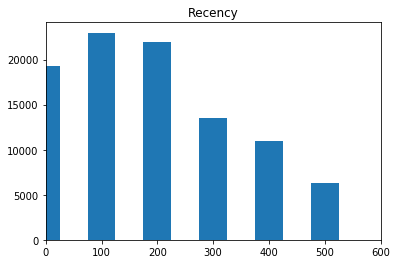

In [4]:
from diffprivlib.tools.histograms import histogram
hist, bin_edges = histogram(df.Recency,epsilon=1, bins =6,range=(0,600))
plt.bar(bin_edges[:-1], hist,width=50)
plt.xlim(min(bin_edges), max(bin_edges))
plt.title("Recency")
plt.show()


### Frequency

In [5]:
df.Frequency.describe()

count    95419.000000
mean         1.232469
std          0.823064
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         75.000000
Name: Frequency, dtype: float64

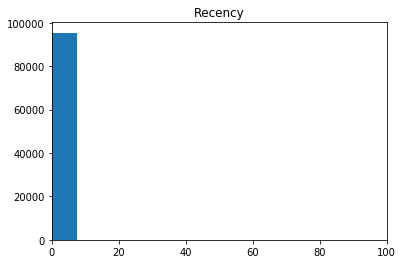

In [6]:
from diffprivlib.tools.histograms import histogram
hist, bin_edges = histogram(df.Frequency,epsilon=1, bins =4,range=(0,100))
plt.bar(bin_edges[:-1], hist,width=15)
plt.xlim(min(bin_edges), max(bin_edges))
plt.title("Recency")
plt.show()

### Monetary

In [7]:
df.Monetary.describe()

count     95419.000000
mean        212.831142
std         641.763082
min           9.590000
25%          63.910000
50%         113.150000
75%         202.545000
max      109312.640000
Name: Monetary, dtype: float64

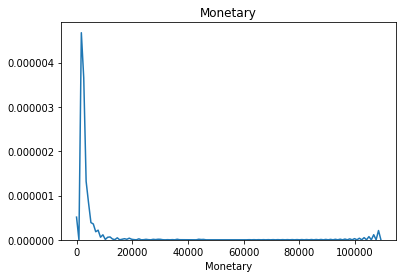

In [8]:
sns.distplot(df['Monetary'], hist=False)
plt.title("Monetary")
plt.show()

### K-means Clustering

### Recency

In [9]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

Elbow Method:

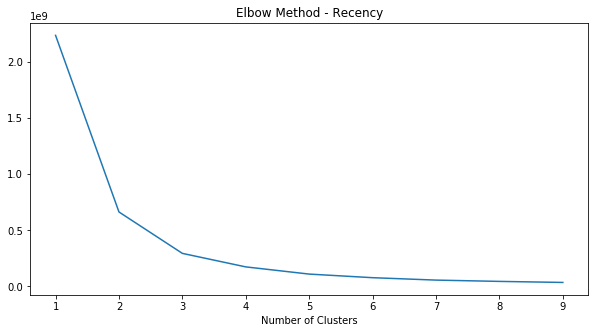

In [10]:
from sklearn.cluster import KMeans
df_recency = df[['Recency']]
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_recency)
    df_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.title("Elbow Method - Recency")
plt.show()

Kmeans Clustering :

In [15]:
from diffprivlib.models.k_means import KMeans
kmeans = KMeans(n_clusters=5,epsilon=1,bounds=None)
kmeans.fit(df[['Recency']])
df['RecencyCluster'] = kmeans.predict(df[['Recency']])
df = order_cluster('RecencyCluster', 'Recency',df,False)
df.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,4987.0,563.938841,39.141833,524.0,538.0,556.0,576.0,729.0
1,9843.0,469.254699,27.976328,422.0,446.0,469.0,491.0,523.0
2,16152.0,360.006872,34.762661,301.0,329.0,358.0,390.0,421.0
3,31950.0,228.829765,42.045750,158.0,192.0,228.0,270.0,300.0
4,32487.0,82.402561,44.330031,0.0,41.0,83.0,122.0,157.0


<br><br>

### Frequency

Elbow Method:

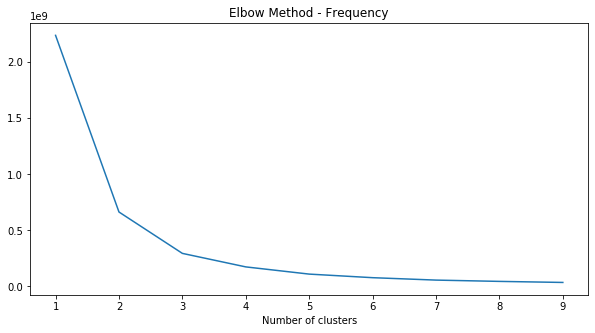

In [16]:
from sklearn.cluster import KMeans
df_frequency = df[['Frequency']]
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_recency)
    df_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.title("Elbow Method - Frequency")
plt.xlabel("Number of clusters")
plt.show()

Kmeans Clustering:

In [17]:
from diffprivlib.models.k_means import KMeans
kmeans = KMeans(epsilon=1,bounds=None,n_clusters=5)
kmeans.fit(df[['Frequency']])
df['FrequencyCluster'] = kmeans.predict(df[['Frequency']])
df = order_cluster('FrequencyCluster', 'Frequency',df,True)
df.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,81088.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
1,13503.0,2.278531,0.579449,2.0,2.0,2.0,2.00,4.0
2,788.0,6.276650,1.718311,5.0,5.0,6.0,6.00,12.0
3,40.0,20.000000,10.725001,13.0,14.0,16.0,21.25,75.0


<br><br>

### Monetary

Elbow Method:

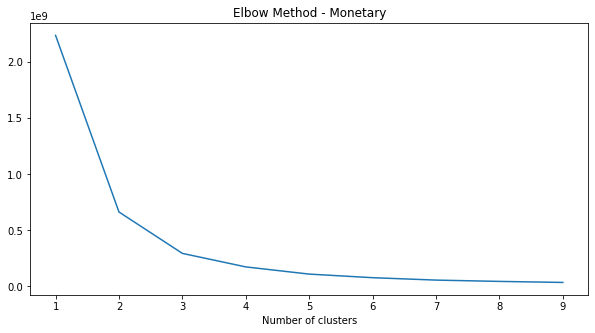

In [18]:
from sklearn.cluster import KMeans
df_frequency = df[['Monetary']]
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_recency)
    df_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.title("Elbow Method - Monetary")
plt.xlabel("Number of clusters")
plt.show()

Kmeans Clustering:

In [19]:
from diffprivlib.models.k_means import KMeans
kmeans = KMeans(epsilon=1,bounds=None,n_clusters=6)
kmeans.fit(df[['Monetary']])
df['RevenueCluster'] = kmeans.predict(df[['Monetary']])
df = order_cluster('RevenueCluster', 'Monetary',df,True)
df.groupby('RevenueCluster')['Monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,95377.0,204.549912,365.558968,9.59,63.880,113.13,202.12,8780.50
1,38.0,14833.470000,5823.380389,8891.00,10144.725,12395.44,17757.91,30186.00
2,3.0,41931.080000,4751.319074,36489.24,40268.620,44048.00,44652.00,45256.00
3,1.0,109312.640000,NaN,109312.64,109312.640,109312.64,109312.64,109312.64


<br><br>

### Overall Scores

In [20]:
df['OverallScore'] = df['RecencyCluster'] + df['FrequencyCluster'] + df['RevenueCluster']
df.groupby('OverallScore')['Recency','Frequency','Monetary'].mean()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Recency,Frequency,Monetary
OverallScore,,,
0,524.594852,1.000000,126.541658
1,408.912714,1.091186,143.955227
2,289.133736,1.111946,157.202039
3,182.548961,1.156991,169.560398
4,81.525884,1.221951,193.992631
5,101.805080,2.328824,578.894495
6,118.049841,3.080594,1325.680223
7,120.946341,4.685366,2392.553244
8,113.523810,6.395238,3734.427095


<br><br>

### Segmentation

In [21]:
df['Segment'] = 'Low-Value'
df.loc[df['OverallScore']>3,'Segment'] = 'Mid-Value' 
df.loc[df['OverallScore']>6,'Segment'] = 'High-Value' 
df.head()

,customer_unique_id,Recency,Frequency,Monetary,RecencyCluster,FrequencyCluster,RevenueCluster,OverallScore,Segment
0,0a0a92112bd4c708ca5fde585afaa872,339,8,109312.64,1,3,4,8,High-Value
1,20a5257c01689ac69410a14cb51bb447,356,10,17671.00,1,3,2,6,Mid-Value
2,93bc212addb25a5f5139fded3c2ee6b3,333,10,18667.00,2,3,2,7,High-Value
3,6d394722d5fc5e721aee6875a218d8db,303,8,16313.60,2,3,2,7,High-Value
4,d97b3cfb22b0d6b25ac9ed4e9c2d481b,321,13,9773.81,2,3,2,7,High-Value


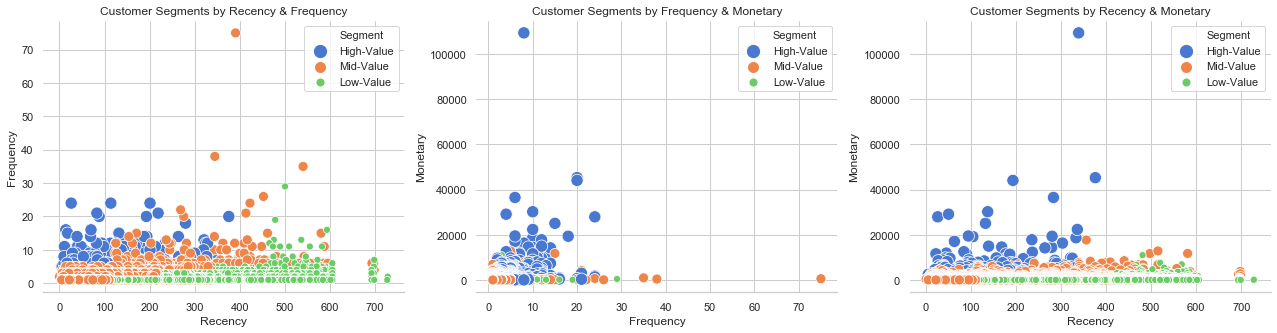

In [22]:
sns.set(palette='muted', color_codes=True, style='whitegrid')
fig, axs = plt.subplots(1, 3, figsize=(22, 5))
sns.despine(left=True)
sns.scatterplot(x='Recency', y='Frequency', ax=axs[0], hue='Segment', data=df, size='Segment', sizes=(50,150), size_order=['High-Value','Mid-Value','Low-Value'])
sns.scatterplot(x='Frequency', y='Monetary', ax=axs[1], hue='Segment', data=df, size='Segment' , sizes=(50,150), size_order=['High-Value','Mid-Value','Low-Value'])
sns.scatterplot(x='Recency', y='Monetary', ax=axs[2], hue='Segment', data=df, size='Segment' , sizes=(50,150), size_order=['High-Value','Mid-Value','Low-Value'])
axs[0].set_title('Customer Segments by Recency & Frequency')
axs[1].set_title('Customer Segments by Frequency & Monetary')
axs[2].set_title('Customer Segments by Recency & Monetary')
plt.show()